### 🔹 Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# import string
# import re

from ydata_profiling import ProfileReport
import sweetviz as sv

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import RidgeClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# from sklearn.metrics import roc_curve, auc

from wordcloud import WordCloud

In [ ]:
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')

### 🔹 Load Fake and True News Datasets

In [61]:
# https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset/data

fake_df = pd.read_csv(r"C:\Users\Administrator\Downloads\New folder\Projects\Projects\Fake News\Fake.csv")
true_df = pd.read_csv(r"C:\Users\Administrator\Downloads\New folder\Projects\Projects\Fake News\True.csv")

### 🔹 Add Binary Labels

In [62]:
fake_df['label'] = 0
true_df['label'] = 1

### 🔹 Merge Both Datasets

In [63]:
df = pd.concat([fake_df, true_df], ignore_index=True)

### 🔹 Shuffle the Combined Dataset

In [64]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

### 🔹 Handle Missing/Duplicates

In [65]:
df = df.drop_duplicates()
df = df.dropna()

### 🔹 Drop Date column as we dont Need it

In [66]:
df = df.drop(columns=['date'])


### 🔹 Create Combined Content Column

In [67]:
df['content'] = df['title'] + " " + df['text']

### 🔹 Text Cleaning & Normalization

In [68]:
import re
import string

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [69]:
df['clean_content'] = df['content'].apply(clean_text)

In [72]:
df.isna().sum()


title            0
text             0
subject          0
label            0
content          0
clean_content    0
dtype: int64

### 🔹 Visualize Class Distribution

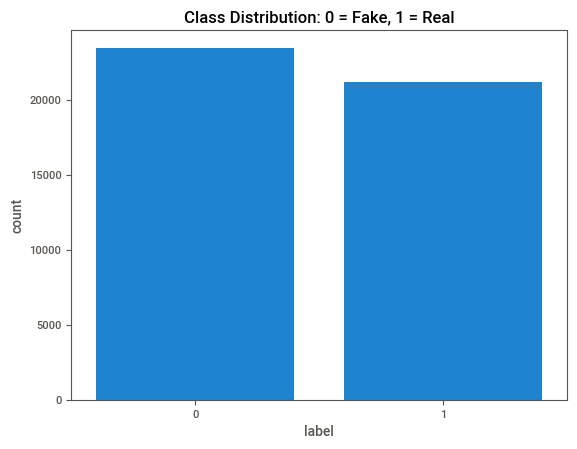

In [70]:
sns.countplot(x='label', data=df)
plt.title("Class Distribution: 0 = Fake, 1 = Real")
plt.show()

### 🔹 Word Cloud (Optional)

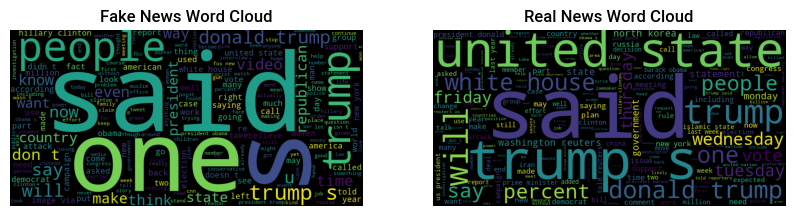

In [71]:
fake_words = ' '.join(df[df['label']==0]['clean_content'])
real_words = ' '.join(df[df['label']==1]['clean_content'])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=800, height=400).generate(fake_words))
plt.title("Fake News Word Cloud")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=800, height=400).generate(real_words))
plt.title("Real News Word Cloud")
plt.axis('off')
plt.show()

### 🔹AutoEDA Using Panda Profiling

In [ ]:
# ✅ Generate the profile report
profile = ProfileReport(df, title="Fake News Sample Report", explorative=True)

# ✅ Save to file (adjust path if needed)
profile.to_file(r"C:\Users\Administrator\Downloads\New folder\Projects\Projects\Fake News/Fake_News_Sample_Report.html")


In [76]:
import webbrowser
webbrowser.open(r"C:\Users\Administrator\Downloads\New folder\Projects\Projects\Fake News\Fake_News_Sample_Report.html")


True

### 🔹AutoEDA Using Sweetviz

In [77]:
report = sv.analyze(df)
report.show_html('Sweetviz_Report.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report Sweetviz_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 🔹 Vectorize Text using TF-IDF

In [78]:
# Step 1: Initialize the vectorizer
vectorizer = TfidfVectorizer(
    stop_words='english',     # removes common English stopwords
    max_features=5000,        # keep top 5000 words (adjustable)
    lowercase=True,           # just in case your clean_content missed anything
    strip_accents='unicode',  # normalize accents (é → e)
    ngram_range=(1, 2),       # include unigrams AND bigrams for more context
)

# Step 2: Fit & transform the cleaned text
X = vectorizer.fit_transform(df['clean_content'])

# Step 3: Target variable
y = df['label']

In [79]:
print(vectorizer.get_feature_names_out()[:20])  # Show first 20 words

['abandon' 'abandoned' 'abbas' 'abc' 'abc news' 'abdullah' 'abe' 'abedin'
 'ability' 'able' 'abortion' 'abortions' 'abroad' 'absolute' 'absolutely'
 'abu' 'abuse' 'abuses' 'academic' 'accept']


### 🔹 Train-Test Split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔷 Machine Learning

## 🔹 Define & Train Models

In [81]:
# Define all models
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "Linear SVM": LinearSVC(max_iter=1000),
    "Ridge Classifier": RidgeClassifier(),
    "Multinomial NB": MultinomialNB(),
    "Bernoulli NB": BernoulliNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
}

# Train all models and store them
trained_models = {}

for name, model in models.items():
    print(f"🔧 Training: {name}")
    model.fit(X_train, y_train)
    trained_models[name] = model


🔧 Training: Logistic Regression
🔧 Training: Linear SVM
🔧 Training: Ridge Classifier
🔧 Training: Multinomial NB
🔧 Training: Bernoulli NB
🔧 Training: Random Forest
🔧 Training: Gradient Boosting
🔧 Training: KNN


# 🔷 Evaluation

### 🔹 Evaluation Function

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc
)

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"📊 {name}")
    print(f"Accuracy : {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall   : {rec:.2f}")
    print(f"F1 Score : {f1:.2f}")

    # 🔷 Confusion Matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # 🔶 ROC Curve
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test)
    else:
        y_prob = None

    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc_score = auc(fpr, tpr)

        plt.figure(figsize=(5, 4))
        plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
        plt.plot([0, 1], [0, 1], 'k--', label='Random')
        plt.title(f"ROC Curve - {name}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return {
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }


### 🔹 Evaluate All Models

📊 Logistic Regression
Accuracy : 0.99
Precision: 0.99
Recall   : 0.99
F1 Score : 0.99


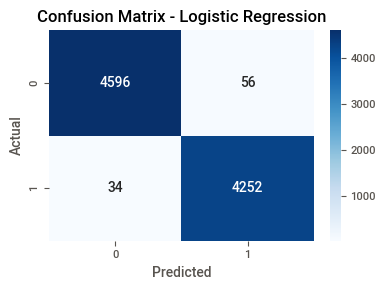

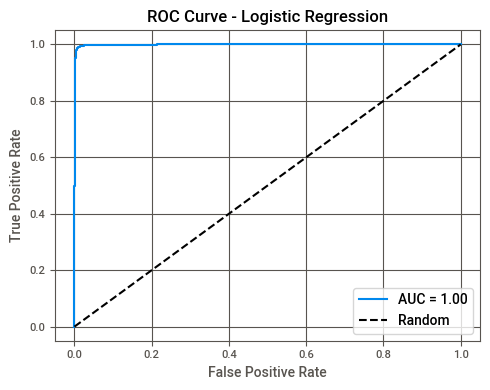

📊 Linear SVM
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1 Score : 1.00


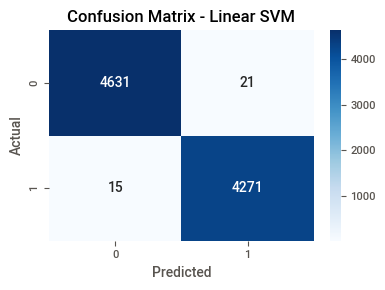

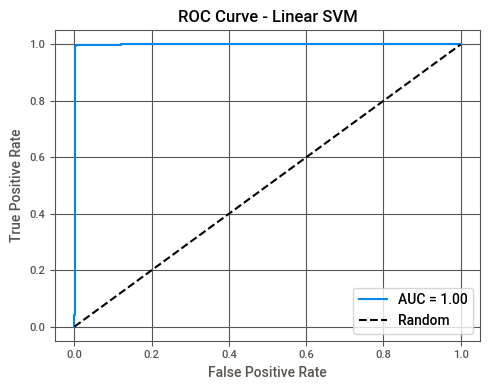

📊 Ridge Classifier
Accuracy : 0.99
Precision: 0.99
Recall   : 1.00
F1 Score : 0.99


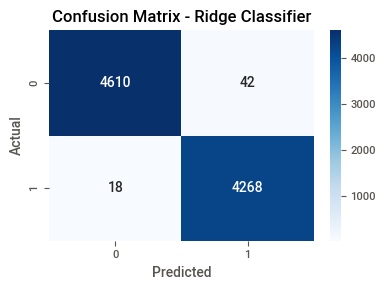

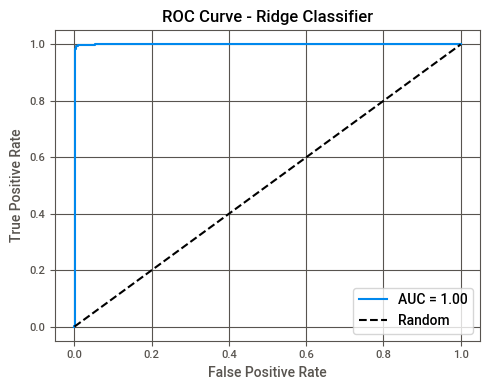

📊 Multinomial NB
Accuracy : 0.94
Precision: 0.94
Recall   : 0.94
F1 Score : 0.94


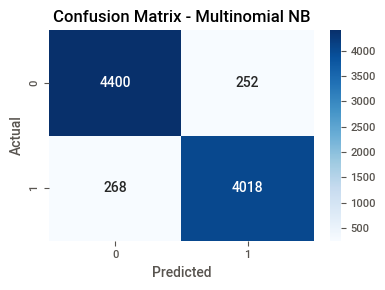

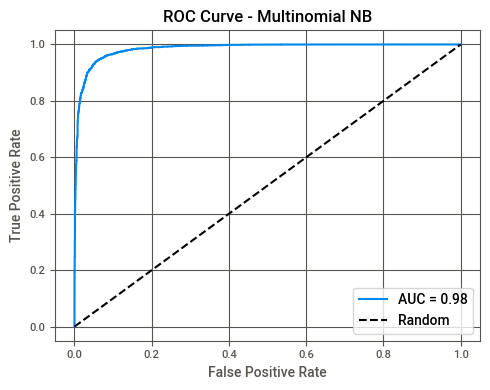

📊 Bernoulli NB
Accuracy : 0.97
Precision: 0.97
Recall   : 0.97
F1 Score : 0.97


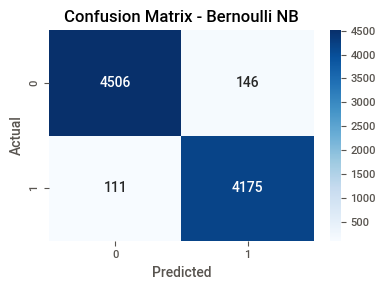

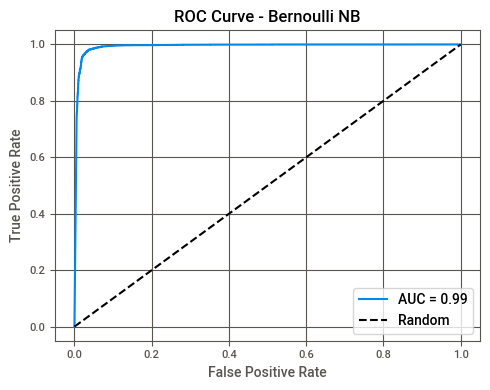

📊 Random Forest
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1 Score : 1.00


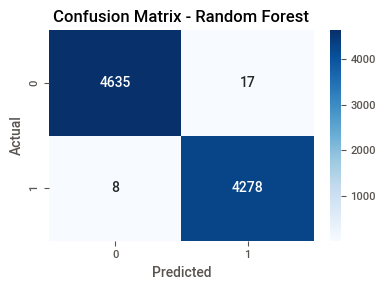

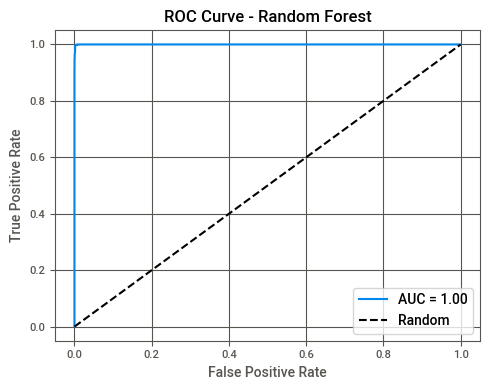

📊 Gradient Boosting
Accuracy : 1.00
Precision: 0.99
Recall   : 1.00
F1 Score : 1.00


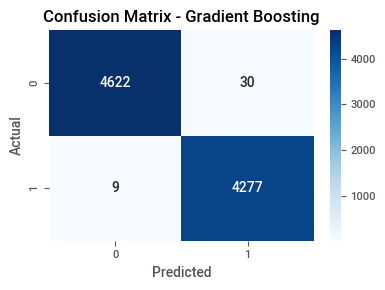

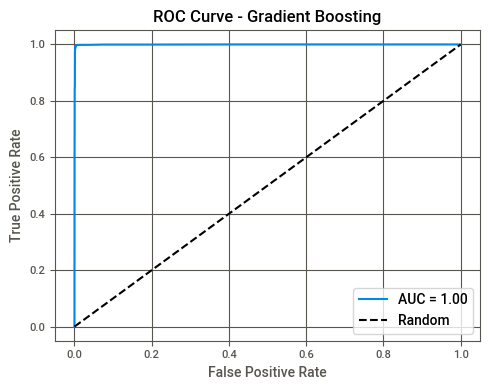

📊 KNN
Accuracy : 0.72
Precision: 0.93
Recall   : 0.45
F1 Score : 0.61


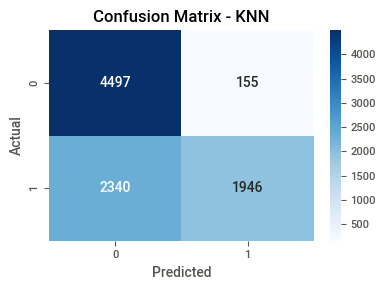

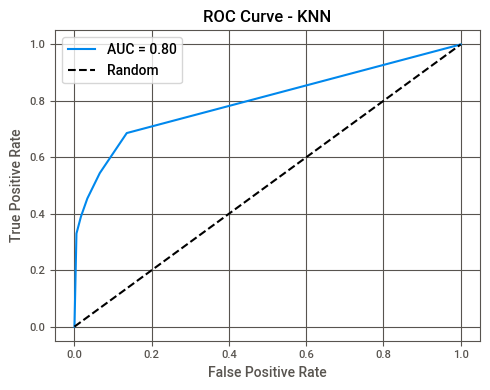

In [83]:
all_results = []

for name, model in trained_models.items():
    result = evaluate_model(name, model, X_test, y_test)
    all_results.append(result)


### 🔹 Comparison Table

In [84]:
results_df = pd.DataFrame(all_results).sort_values(by="F1 Score", ascending=False)
results_df.reset_index(drop=True, inplace=True)
results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.997203,0.996042,0.998133,0.997087
1,Linear SVM,0.995972,0.995107,0.996500,0.995803
2,Gradient Boosting,0.995637,0.993035,0.997900,0.995461
3,Ridge Classifier,0.993287,0.990255,0.995800,0.993020
4,Logistic Regression,0.989931,0.987001,0.992067,0.989528
5,Bernoulli NB,0.971246,0.966212,0.974102,0.970141
6,Multinomial NB,0.941821,0.940984,0.937471,0.939224
7,KNN,0.720855,0.926226,0.454036,0.609363


### 🔹 Model Performance Comparison for All Models

C:\Users\Administrator\AppData\Local\Temp\ipykernel_30708\3668537921.py:7: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Roboto.
  plt.tight_layout()
c:\Users\Administrator\Downloads\New folder\Projects\Projects\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Roboto.
  fig.canvas.print_figure(bytes_io, **kw)


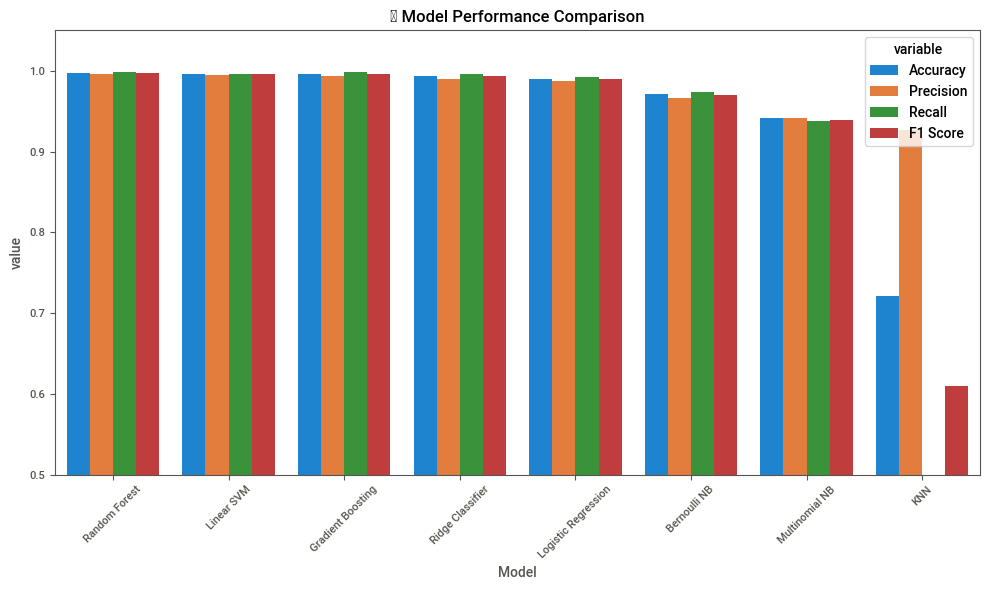

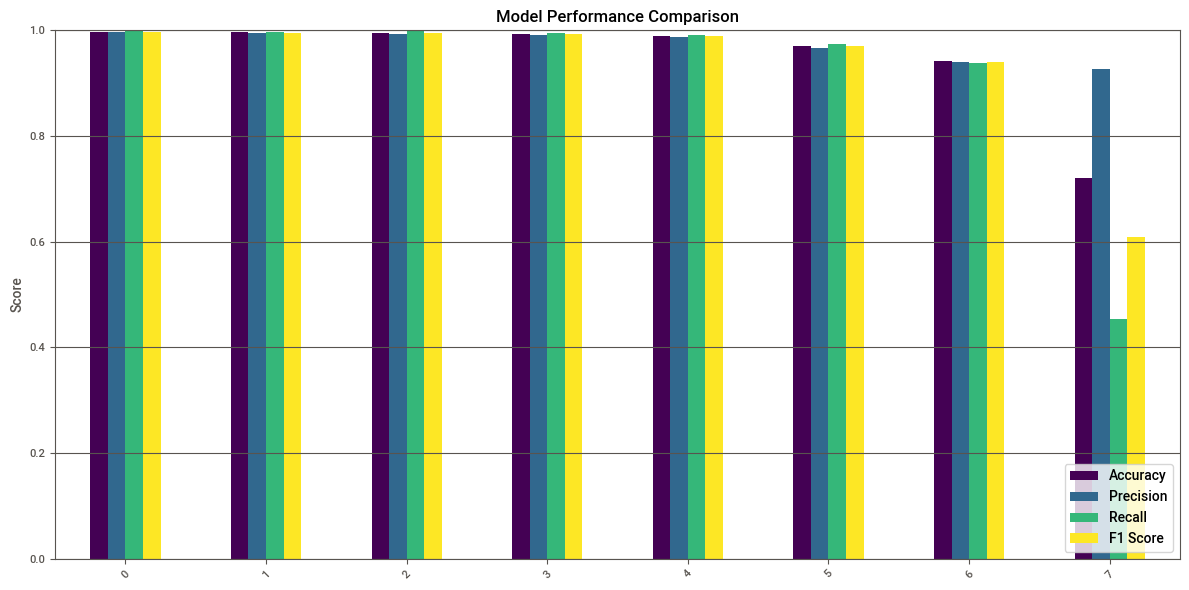

In [111]:
plt.figure(figsize=(10, 6))
melted = results_df.melt(id_vars="Model", value_vars=["Accuracy", "Precision", "Recall", "F1 Score"])
sns.barplot(data=melted, x='Model', y='value', hue='variable')
plt.title("📈 Model Performance Comparison")
plt.xticks(rotation=45)
plt.ylim(0.5, 1.05)
plt.tight_layout()
plt.show()

results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


### 🔹 confusion matrix for All Models

C:\Users\Administrator\AppData\Local\Temp\ipykernel_30708\1339269106.py:32: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Roboto.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
c:\Users\Administrator\Downloads\New folder\Projects\Projects\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Roboto.
  fig.canvas.print_figure(bytes_io, **kw)


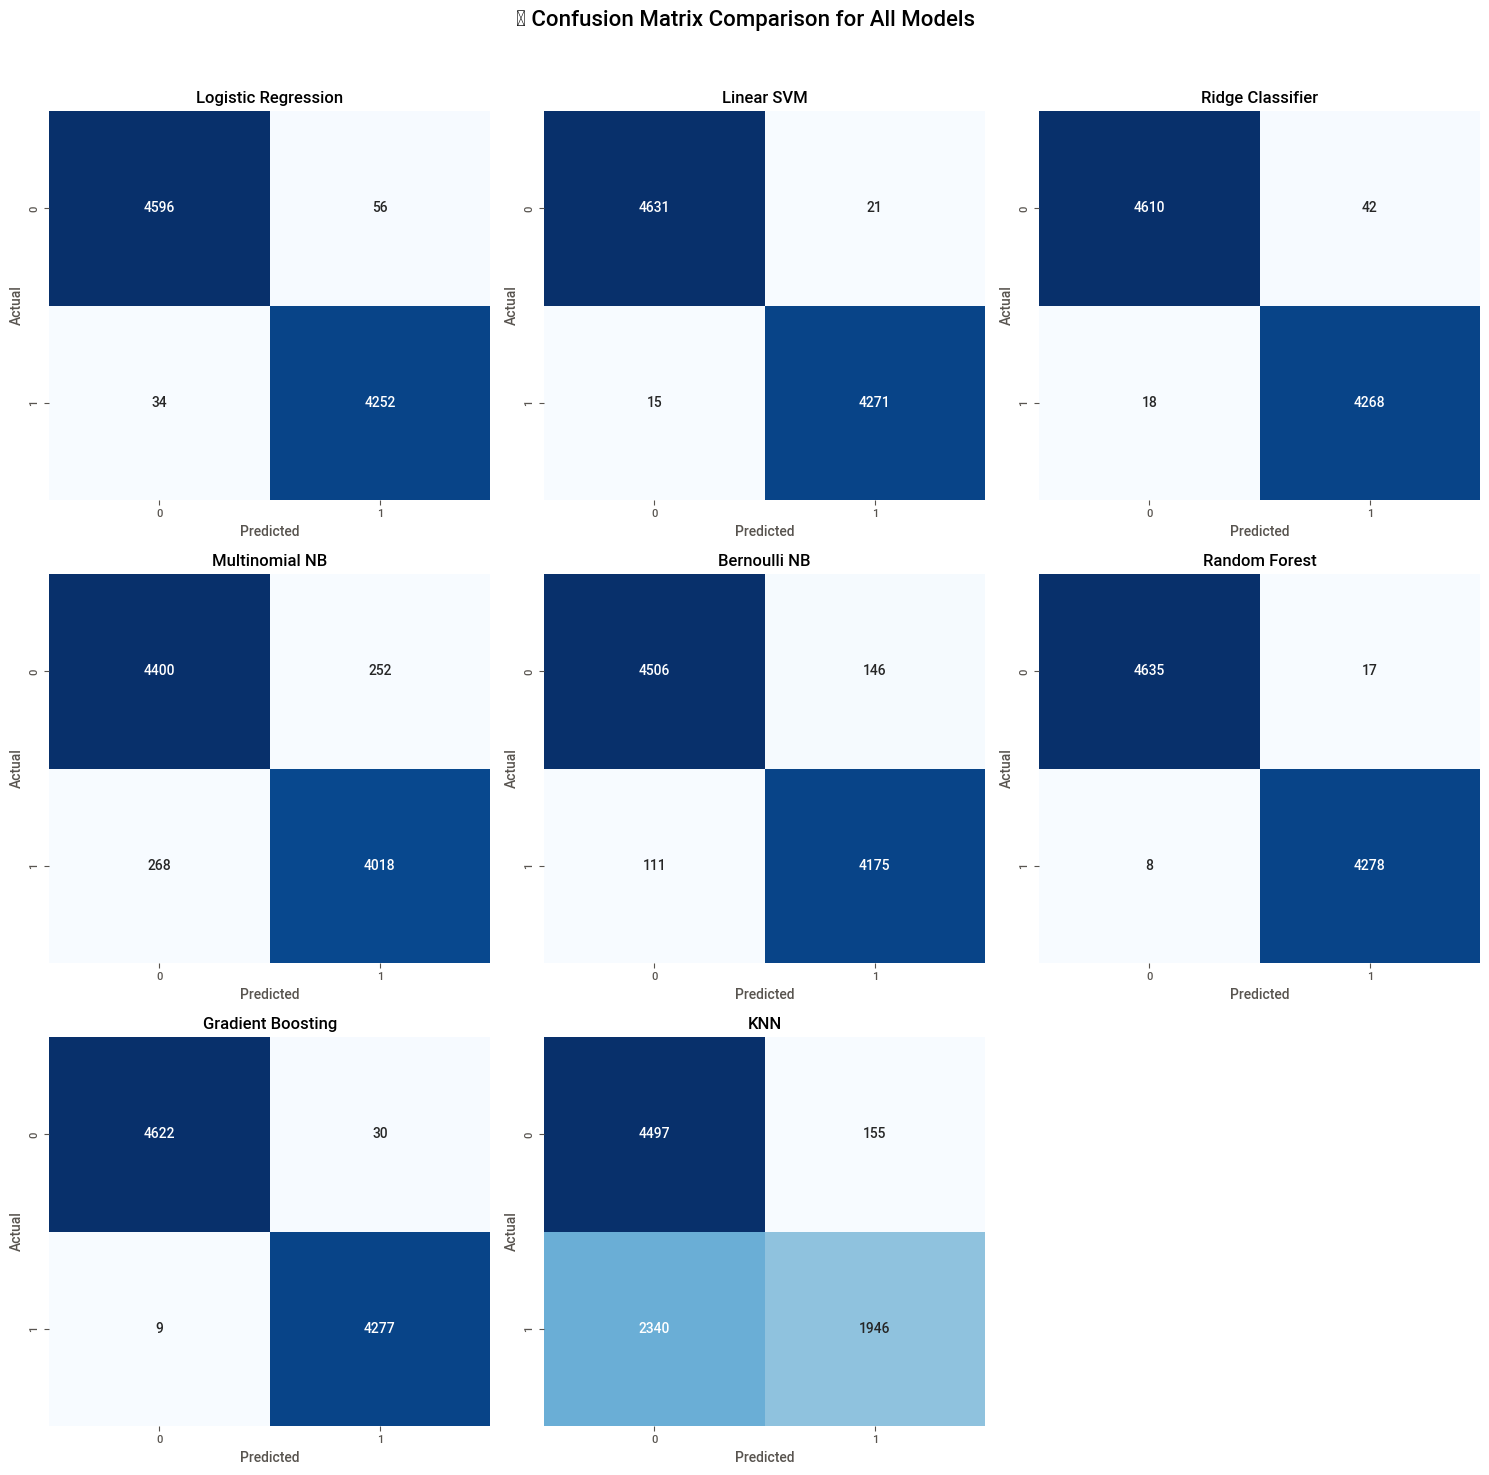

In [87]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Total models
n_models = len(trained_models)

# Grid size (3 columns)
cols = 3
rows = math.ceil(n_models / cols)

# Create subplot grid
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten to index easily

# Plot confusion matrix for each model
for i, (name, model) in enumerate(trained_models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False)
    axes[i].set_title(name)
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

# Remove extra empty plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("📉 Confusion Matrix Comparison for All Models", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### 🔹 ROC Curves for All Models

C:\Users\Administrator\AppData\Local\Temp\ipykernel_30708\1638878378.py:41: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Roboto.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
c:\Users\Administrator\Downloads\New folder\Projects\Projects\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Roboto.
  fig.canvas.print_figure(bytes_io, **kw)


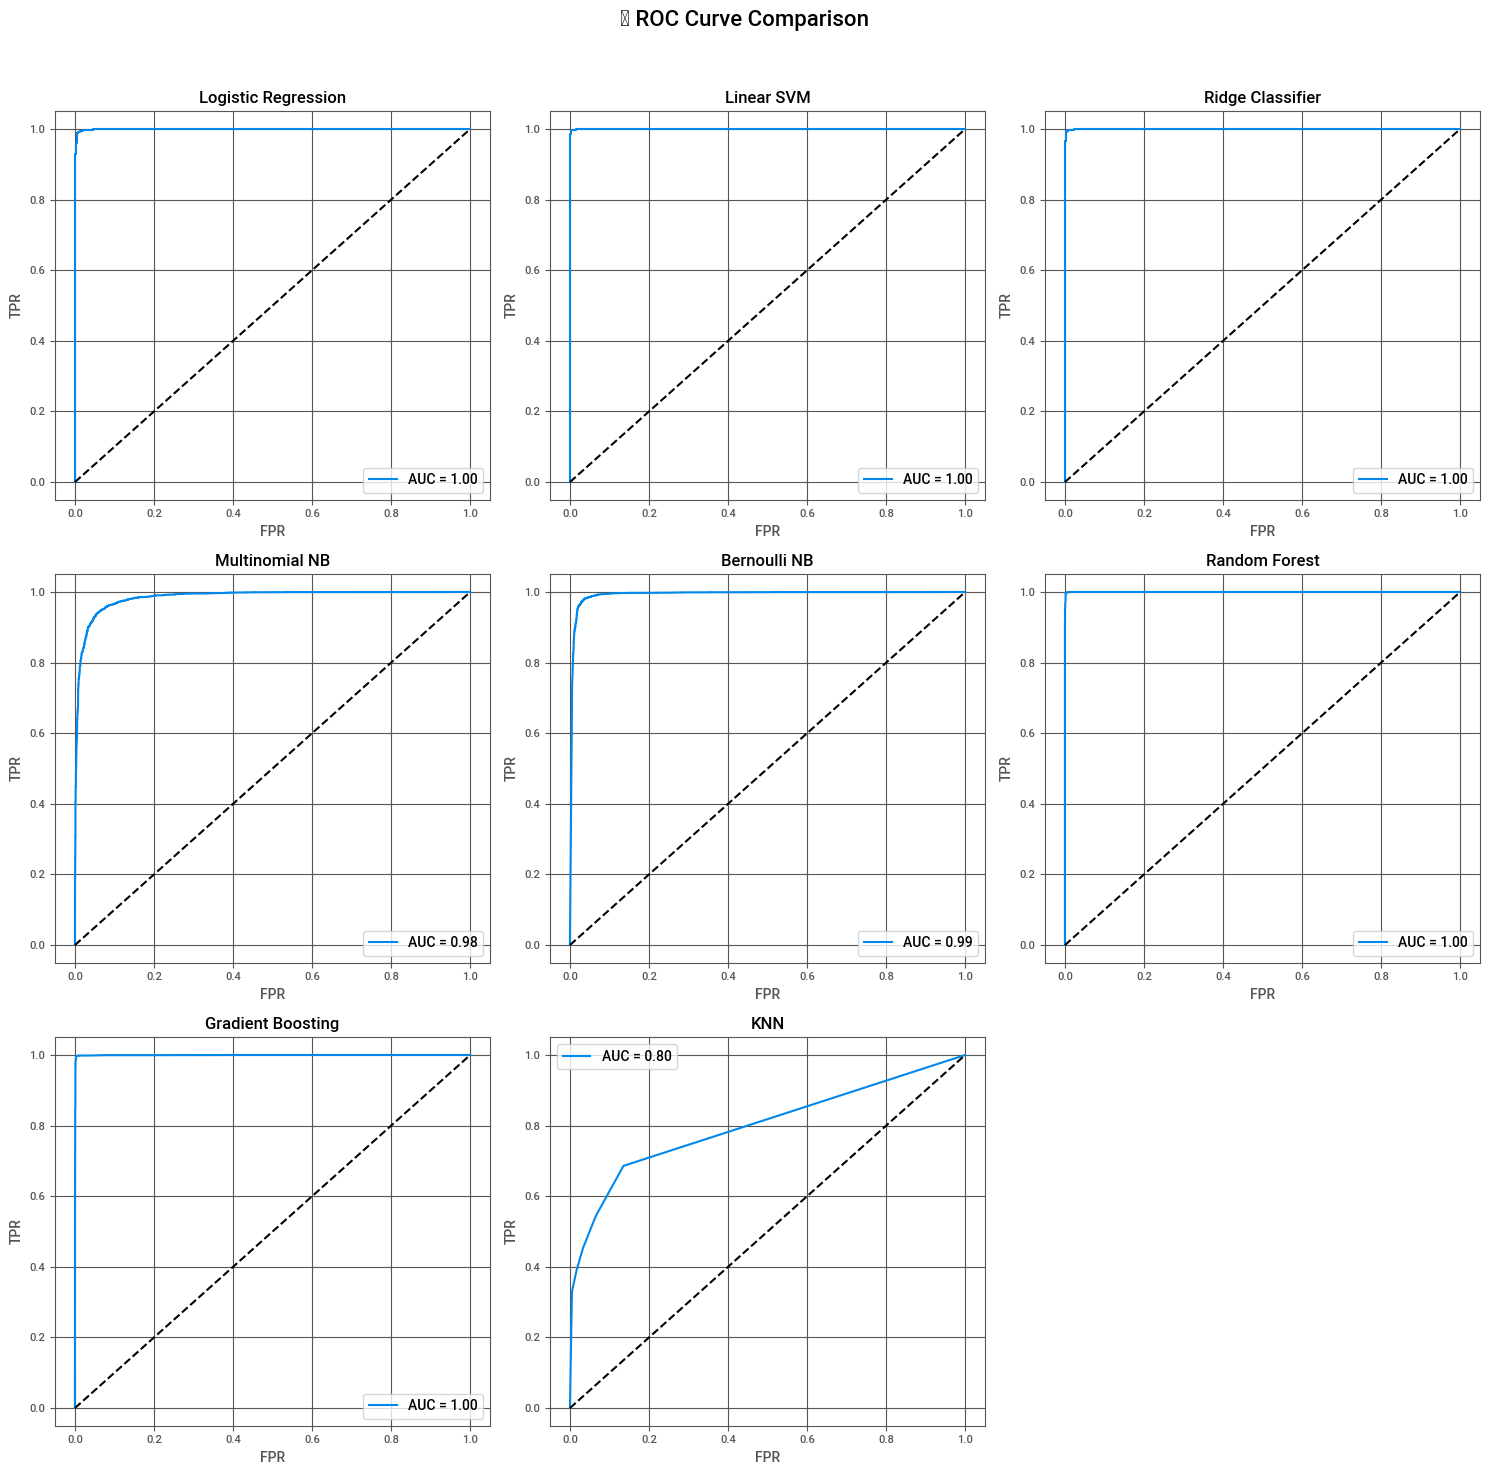

In [88]:
from sklearn.metrics import roc_curve, auc
import math

n_models = len(trained_models)
cols = 3
rows = math.ceil(n_models / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, (name, model) in enumerate(trained_models.items()):
    # Try to get probabilities
    try:
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_prob = model.decision_function(X_test)
        else:
            continue

        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        axes[i].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
        axes[i].plot([0, 1], [0, 1], 'k--')
        axes[i].set_title(name)
        axes[i].set_xlabel("FPR")
        axes[i].set_ylabel("TPR")
        axes[i].legend()
        axes[i].grid(True)

    except Exception as e:
        axes[i].text(0.5, 0.5, "No ROC", ha='center', va='center')
        axes[i].set_title(name)

# Remove extra axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("📈 ROC Curve Comparison", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### 🔹 Precision-Recall Curves for All Models

C:\Users\Administrator\AppData\Local\Temp\ipykernel_30708\3433271606.py:31: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Roboto.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
c:\Users\Administrator\Downloads\New folder\Projects\Projects\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Roboto.
  fig.canvas.print_figure(bytes_io, **kw)


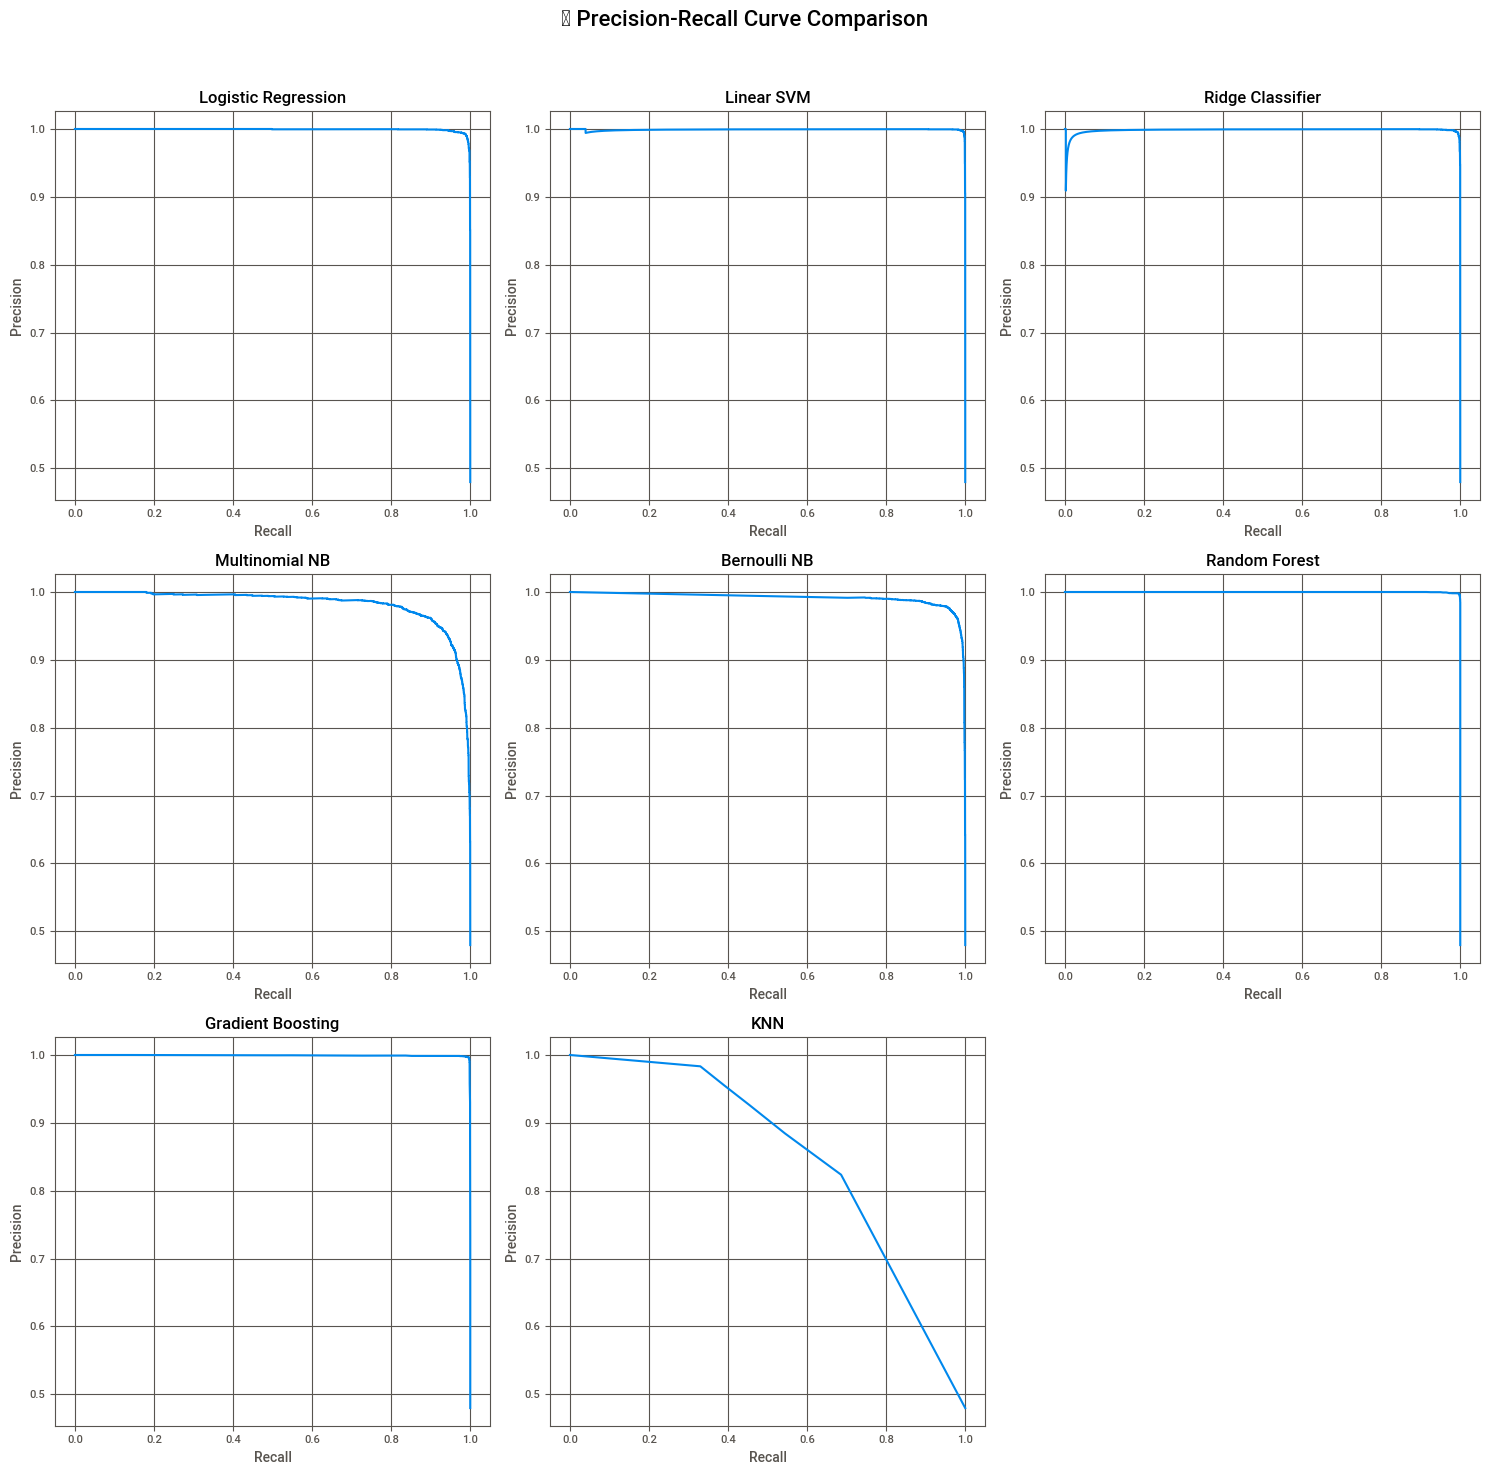

In [89]:
from sklearn.metrics import precision_recall_curve

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, (name, model) in enumerate(trained_models.items()):
    try:
        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_scores = model.decision_function(X_test)
        else:
            continue

        precision, recall, _ = precision_recall_curve(y_test, y_scores)

        axes[i].plot(recall, precision, label=name)
        axes[i].set_title(name)
        axes[i].set_xlabel("Recall")
        axes[i].set_ylabel("Precision")
        axes[i].grid(True)

    except:
        axes[i].text(0.5, 0.5, "Not Available", ha='center', va='center')
        axes[i].set_title(name)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("📉 Precision-Recall Curve Comparison", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### 🔹 ROC Curve Comparison for All Models

❌ KNN failed: Unable to allocate 1.00 GiB for an array with shape (3754, 35751) and data type float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_30708\689682472.py:33: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Roboto.
  plt.tight_layout()
c:\Users\Administrator\Downloads\New folder\Projects\Projects\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Roboto.
  fig.canvas.print_figure(bytes_io, **kw)


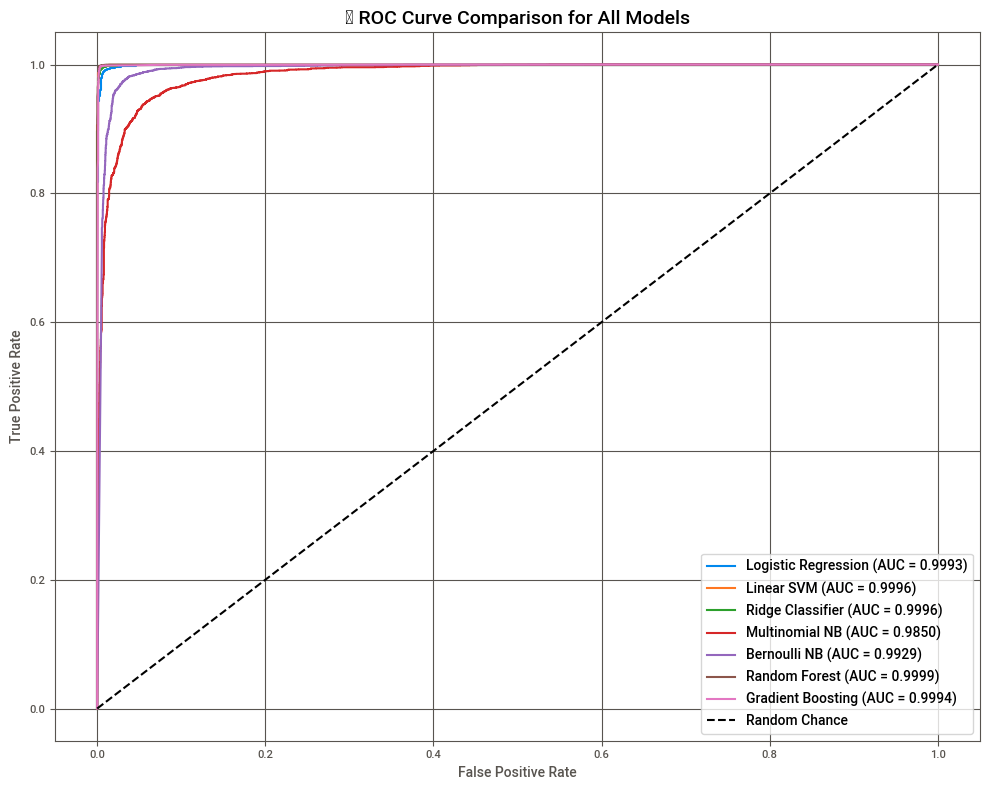

In [93]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for name, model in trained_models.items():
    try:
        # Use probability if available
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_proba = model.decision_function(X_test)
        else:
            print(f"⚠️ {name} skipped — no probability or decision function.")
            continue

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

    except Exception as e:
        print(f"❌ {name} failed: {e}")

# Random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

# Plot styling
plt.title('📈 ROC Curve Comparison for All Models', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Calibration Curve

⚠️ Linear SVM skipped: no predict_proba.
⚠️ Ridge Classifier skipped: no predict_proba.


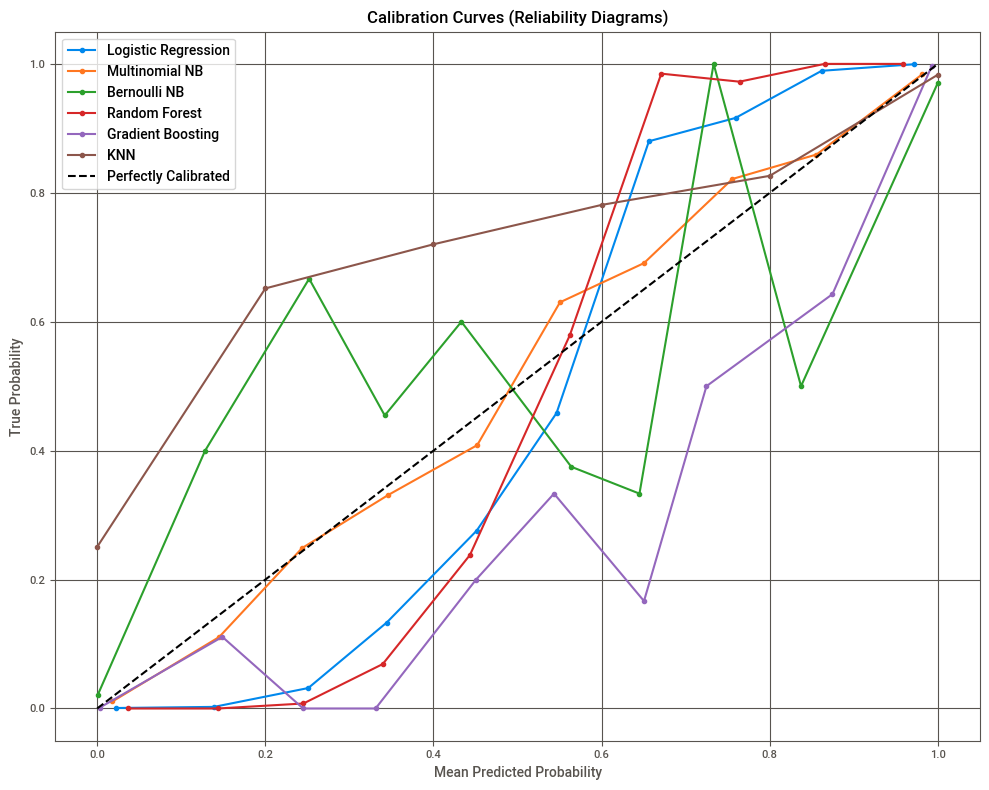

In [101]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(10, 8))

for name, model in trained_models.items():
    try:
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        else:
            print(f"⚠️ {name} skipped: no predict_proba.")
            continue

        if np.min(y_proba) < 0 or np.max(y_proba) > 1:
            print(f"❌ {name} skipped: y_proba out of [0, 1] range.")
            continue

        prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10, strategy='uniform')
        plt.plot(prob_pred, prob_true, marker='o', label=name)

    except Exception as e:
        print(f"❌ {name} failed: {e}")

plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')
plt.title("Calibration Curves (Reliability Diagrams)")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("True Probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 🔷  30. Compare Model Performances

#### Define a function to evaluate and return metrics

In [105]:
def get_model_scores(name, model, X_test, y_test, proba=False):
    if hasattr(model, "predict_proba") and proba:
        y_pred = model.predict_proba(X_test)[:, 1]
        y_pred = np.round(y_pred)
    else:
        y_pred = model.predict(X_test)
    
    if hasattr(y_pred, 'flatten'):
        y_pred = np.round(y_pred.flatten())
    
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

#### Collect scores from all ML models

In [ ]:
results = []

results.append(get_model_scores("Logistic Regression", lr, X_test, y_test, proba=True))
results.append(get_model_scores("Multinomial NB", nb, X_test, y_test))
results.append(get_model_scores("Linear SVC", svc, X_test, y_test))
results.append(get_model_scores("Random Forest", rf, X_test, y_test, proba=True))
results.append(get_model_scores("Gradient Boosting", xgb, X_test, y_test, proba=True))
results.append(get_model_scores("KNN", knn, X_test, y_test))

#### Create a DataFrame

In [ ]:
results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)
print(results_df)

                     Accuracy  Precision    Recall  F1 Score
Model                                                       
Logistic Regression  0.987245   0.984426  0.989024  0.986719
Multinomial NB       0.936339   0.935287  0.931574  0.933427
Linear SVC           0.994294   0.994160  0.993928  0.994044
Random Forest        0.997762   0.998130  0.997198  0.997664
Gradient Boosting    0.997650   0.997664  0.997431  0.997548
KNN                  0.888789   0.853701  0.926670  0.888690


#### Plot Comparison Chart

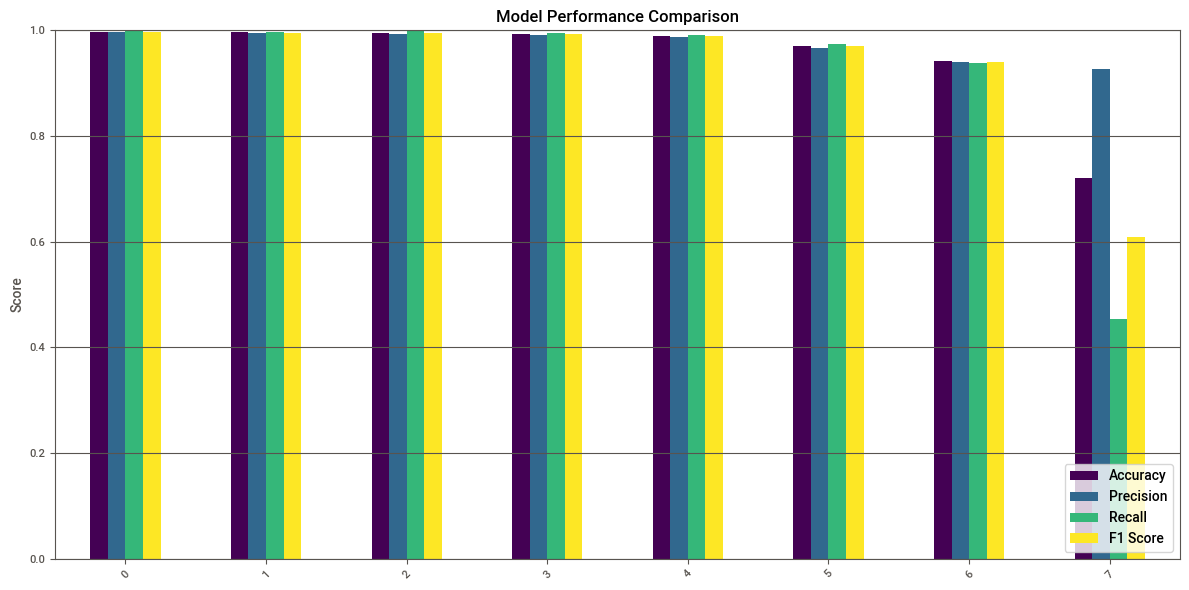

In [106]:
results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

#### Precision-Recall (PR) Curve

C:\Users\Administrator\AppData\Local\Temp\ipykernel_30708\1192969100.py:29: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Roboto.
  plt.tight_layout()
c:\Users\Administrator\Downloads\New folder\Projects\Projects\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Roboto.
  fig.canvas.print_figure(bytes_io, **kw)


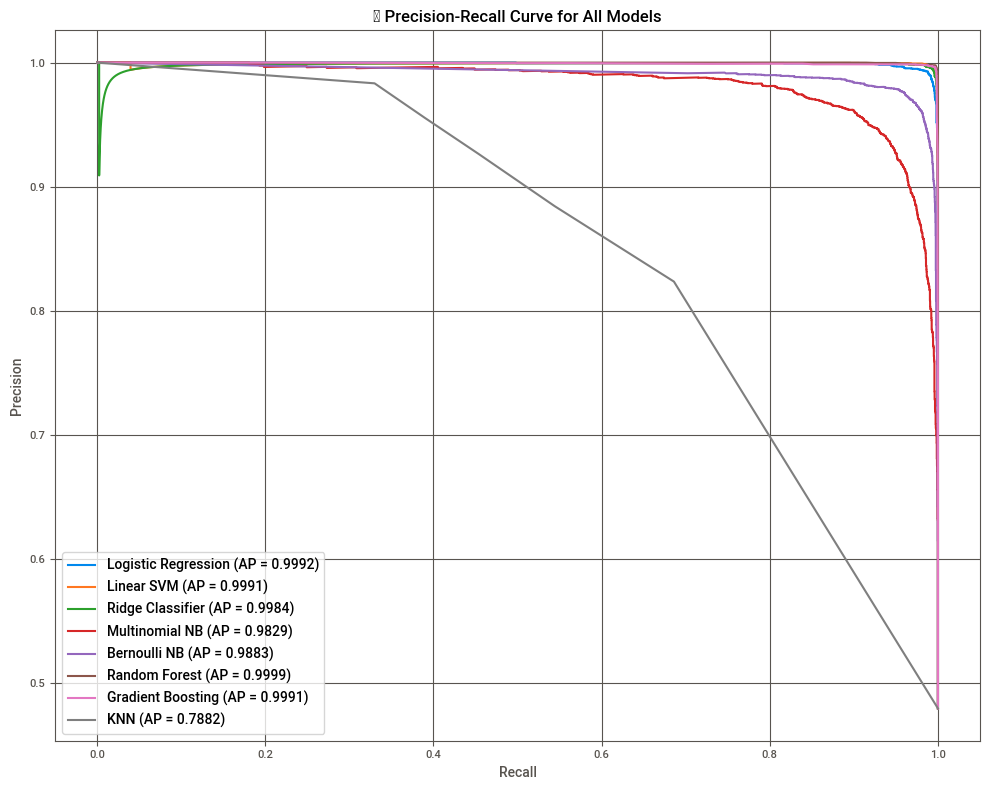

In [94]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for name, model in trained_models.items():
    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_score = model.decision_function(X_test)
        else:
            print(f"⚠️ {name} skipped: no predict_proba or decision_function")
            continue

        precision, recall, _ = precision_recall_curve(y_test, y_score)
        ap_score = average_precision_score(y_test, y_score)

        plt.plot(recall, precision, label=f'{name} (AP = {ap_score:.4f})')

    except Exception as e:
        print(f"❌ {name} failed: {e}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('📉 Precision-Recall Curve for All Models')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Prediction Probability Histogram

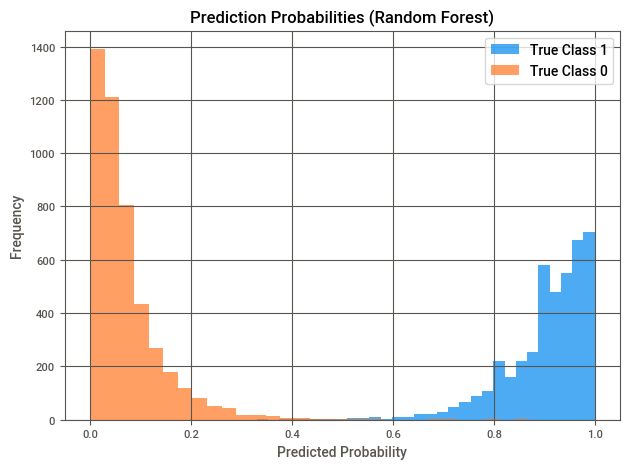

In [ ]:
y_proba = rf.predict_proba(X_test)[:, 1]
plt.hist(y_proba[y_test == 1], bins=30, alpha=0.7, label='True Class 1')
plt.hist(y_proba[y_test == 0], bins=30, alpha=0.7, label='True Class 0')
plt.title("Prediction Probabilities (Random Forest)")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 🔷 Deep Learning

## 🔷 Imports

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Conv1D, GlobalMaxPooling1D
# from transformers import BertTokenizer, TFBertForSequenceClassification

## 🔷 Models

### 🔹 22. Preprocess for DL

In [1]:
# tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
# tokenizer.fit_on_texts(df['clean_content'])

# sequences = tokenizer.texts_to_sequences(df['clean_content'])
# padded = pad_sequences(sequences, maxlen=500)

# X_dl_train, X_dl_test, y_dl_train, y_dl_test = train_test_split(padded, y, test_size=0.2, random_state=42)

### 🔹 23. LSTM Model

In [2]:
# lstm_model = Sequential([
#     Embedding(5000, 64, input_length=500),
#     LSTM(64),
#     Dense(1, activation='sigmoid')
# ])
# lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# lstm_model.fit(X_dl_train, y_dl_train, epochs=5, batch_size=64, validation_data=(X_dl_test, y_dl_test))

### 🔹 24. BiLSTM

In [3]:
# bilstm_model = Sequential([
#     Embedding(5000, 64, input_length=500),
#     Bidirectional(LSTM(64)),
#     Dense(1, activation='sigmoid')
# ])
# bilstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# bilstm_model.fit(X_dl_train, y_dl_train, epochs=5, batch_size=64, validation_data=(X_dl_test, y_dl_test))

### 🔹 25. CNN for Text Classification

In [4]:
# cnn_model = Sequential([
#     Embedding(5000, 64, input_length=500),
#     Conv1D(128, 5, activation='relu'),
#     GlobalMaxPooling1D(),
#     Dense(1, activation='sigmoid')
# ])
# cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# cnn_model.fit(X_dl_train, y_dl_train, epochs=5, batch_size=64, validation_data=(X_dl_test, y_dl_test))

### 🔹 26. BERT Transformer

In [5]:
# bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

# # Further preprocessing and training omitted for brevity

## 🔷 Evaluation

### 🔷  31. Deep Learning Models - Performance Table

#### Define evaluation function for Keras models

In [6]:
# def evaluate_keras_model(name, model, X_test, y_test):
#     y_pred_probs = model.predict(X_test)
#     y_pred = np.round(y_pred_probs).flatten()
    
#     return {
#         'Model': name,
#         'Accuracy': accuracy_score(y_test, y_pred),
#         'Precision': precision_score(y_test, y_pred),
#         'Recall': recall_score(y_test, y_pred),
#         'F1 Score': f1_score(y_test, y_pred)
#     }

#### Get metrics from DL models

In [7]:
# dl_results = []

# dl_results.append(evaluate_keras_model("LSTM", lstm_model, X_dl_test, y_dl_test))
# dl_results.append(evaluate_keras_model("BiLSTM", bilstm_model, X_dl_test, y_dl_test))
# dl_results.append(evaluate_keras_model("CNN", cnn_model, X_dl_test, y_dl_test))

#### Combine ML and DL results

In [8]:
# all_results_df = pd.concat([results_df, pd.DataFrame(dl_results).set_index("Model")])
# print(all_results_df)

#### Visualize All Model Performance

In [9]:
# all_results_df.plot(kind='bar', figsize=(14, 6), colormap='Set2')
# plt.title("All Model Performance Comparison (ML + DL)")
# plt.ylabel("Score")
# plt.ylim(0, 1)
# plt.grid(axis='y')
# plt.xticks(rotation=45)
# plt.legend(loc='lower right')
# plt.tight_layout()
# plt.show()